In [1]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [2]:
test_df = pd.read_csv("../input/test.csv")
train_df = pd.read_csv("../input/train.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data=pd.concat([missing_data_train,missing_data_test], axis=1, sort=False, keys=['Train','test'])
missing_data.head(5)

Train         test      
         Total     %  Total     %
Cabin      687  77.1  327.0  78.2
Age        177  19.9   86.0  20.6
Embarked     2   0.2    0.0   0.0
Fare         0   0.0    1.0   0.2
Ticket       0   0.0    0.0   0.0

In [6]:
train_df.info()
train_df.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# **Data Preprocessing**

### Name


In [7]:
data = [train_df, test_df]
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [8]:
data = [train_df, test_df]

# Ordered by survival rate
titles = {"Mr": 1, "Army": 2, "Master": 3, "Miss": 4, "Mrs": 5}

for dataset in data:
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(["Mme", "Ms",'Mrs',"Countess","Lady","Dona"], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(["Mr", "Sir","Don","Jonkheer"], 'Mr')
    dataset['Title'] = dataset['Title'].replace("Master", 'Master')
    dataset['Title'] = dataset['Title'].replace(["Mlle", 'Miss'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(["Capt", "Col", "Major", "Rev", "Dr"], 'Army')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

1    520
4    184
5    129
3     40
2     18
Name: Title, dtype: int64
{1: 32, 4: 21, 5: 35, 3: 4, 2: 46}


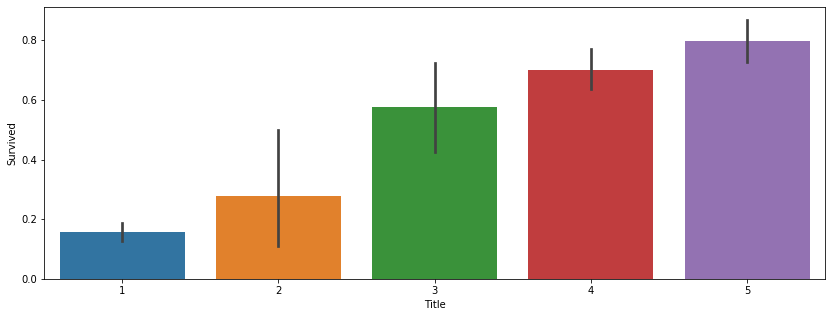

In [9]:
title=train_df['Title'].value_counts().sort_values(ascending=False)
print(title)
mean_age={}
for x in title.index:
    mean_age[x]=int(train_df[train_df['Title']==x].Age.mean())
print(mean_age)
plt.figure(figsize=(14,5))
sns.barplot(x='Title', y='Survived', data=train_df)

In [10]:
test_df['Title'].value_counts().sort_values(ascending=False)

1    240
4     78
5     74
3     21
2      5
Name: Title, dtype: int64

### Drop PassengerId, Name,Ticket
- PassengerID and Ticket: No useful information

In [11]:
train_df = train_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df = test_df.drop(['Name','Ticket'], axis=1)

### Age:
The 'age' feature is an important factor to predict the survival rate, but there are about 20% missing values. Since different 'Title' groups have significant mean ages, it makes much more sense to give the mean values of the corresponding groups to its members with NaN 'age' values.

In [12]:
data = [train_df, test_df]
for dataset in data:
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = dataset.Title[dataset.Age.isnull()].map(mean_age)
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)

In [13]:
data = [train_df, test_df]

for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age    
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
    
    dataset.loc[ dataset['Age'] <= 13, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 13) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 31), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 38), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 50), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 50, 'Age'] = 6
    
train_df['Age'].value_counts().sort_index()

0     75
1    109
2    157
3    127
4    245
5    114
6     64
Name: Age, dtype: int64

### Fare:

Converting "Fare" from float to int64, using the "astype()" function pandas provides:

In [14]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
train_df['Fare'].value_counts().sort_index()

0    241
1    216
2    223
3    158
4     44
5      9
Name: Fare, dtype: int64

### Cabin:
In the 'Cabin', there are too many NaNs to fill. Although it seems like passengers with valid 'Cabin' have much higher survival rate then average, after double check it, the reason is because most of them are from Pclass one. So feature 'Cabin' doesn't provide much new information. We are going to delete it since the column.

In [15]:
print("Survival rate for having Cabin Number & Pclass 1:\t",train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==1)].Survived.sum()/train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==1)].Survived.count(),train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==1)].Survived.count())
print("Survival rate for Pclass 1:\t\t\t\t",train_df[train_df['Pclass']==1].Survived.sum()/train_df[train_df['Pclass']==1].Survived.count())
print("Survival rate for having Cabin Number & Pclass 2:\t",train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==2)].Survived.sum()/train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==2)].Survived.count(),train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==2)].Survived.count())
print("Survival rate for Pclass 2:\t\t\t\t",train_df[train_df['Pclass']==2].Survived.sum()/train_df[train_df['Pclass']==2].Survived.count())
print("Survival rate for having Cabin Number & Pclass 3:\t",train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==3)].Survived.sum()/train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==3)].Survived.count(),train_df[train_df['Cabin'].notnull() & (train_df['Pclass']==3)].Survived.count())
print("Survival rate for Pclass 3:\t\t\t\t",train_df[train_df['Pclass']==3].Survived.sum()/train_df[train_df['Pclass']==3].Survived.count())

Survival rate for having Cabin Number & Pclass 1:	 0.6647727272727273 176
Survival rate for Pclass 1:				 0.6296296296296297
Survival rate for having Cabin Number & Pclass 2:	 0.8125 16
Survival rate for Pclass 2:				 0.47282608695652173
Survival rate for having Cabin Number & Pclass 3:	 0.5 12
Survival rate for Pclass 3:				 0.24236252545824846


In [16]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

### Embarked:

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [17]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [19]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Sex:

Convert 'Sex' feature into numeric.

In [20]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

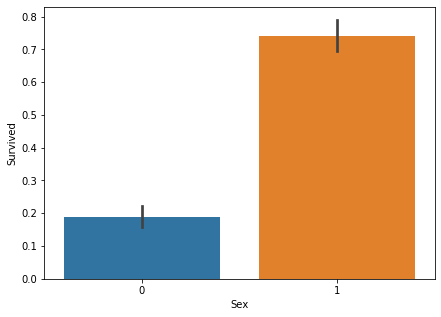

In [21]:
plt.figure(figsize=(7,5))
sns.barplot(x='Sex', y='Survived', data=train_df)


### QC:

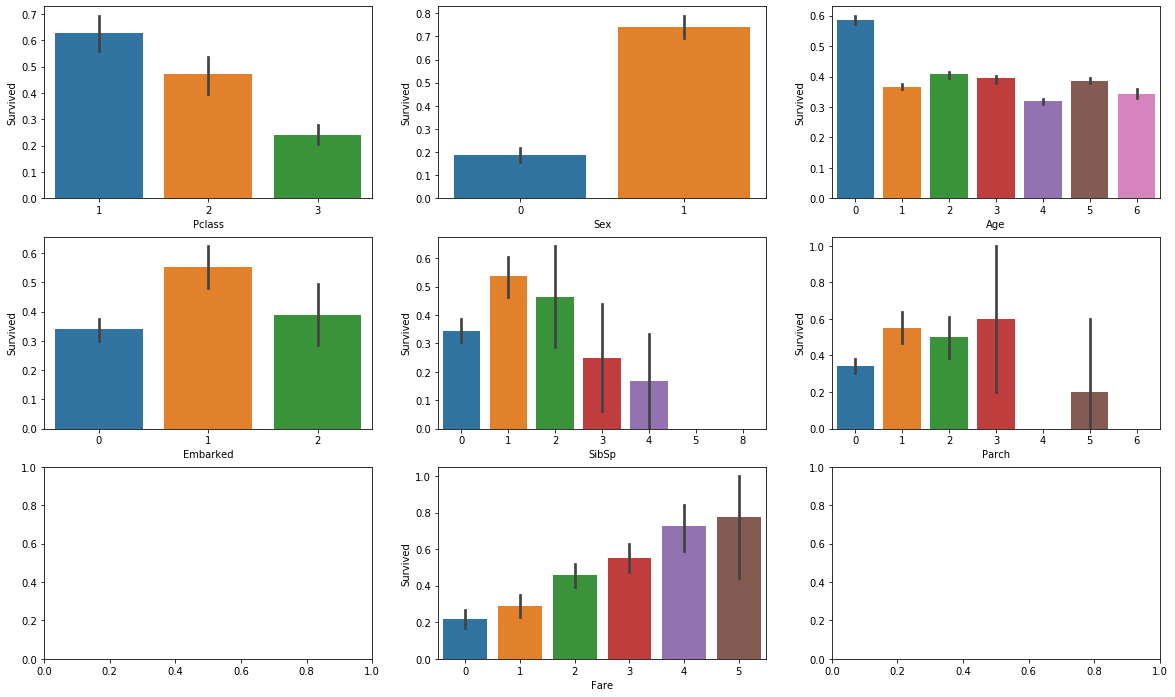

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20, 12))
sns.barplot(x='Pclass', y='Survived', data=train_df,ax = axes[0][0])
sns.barplot(x='Sex', y='Survived', data=train_df,ax = axes[0][1])
sns.barplot(x='Age', y='Survived', data=train_df,ci=20, ax = axes[0][2])
sns.barplot(x='Embarked', y='Survived', data=train_df,ax = axes[1][0])
sns.barplot(x='SibSp', y='Survived', data=train_df,ax = axes[1][1])
sns.barplot(x='Parch', y='Survived', data=train_df,ax = axes[1][2])
sns.barplot(x='Fare', y='Survived', data=train_df,ax = axes[2][1])

In [23]:
train_df.info()
print("\n",train_df.columns.values,"\n")
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
 8   Title     891 non-null    int64
dtypes: int64(9)
memory usage: 62.8 KB

 ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'] 



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,2,1,0,0,0,1
1,1,1,1,4,1,0,3,1,5
2,1,3,1,3,0,0,0,0,4
3,1,1,1,4,1,0,3,0,5
4,0,3,0,4,0,0,1,0,1


In [24]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,3.072952,0.523008,0.381594,1.523008,0.361392,2.308642
std,0.486592,0.836071,0.477990,1.689444,1.102743,0.806057,1.250743,0.635673,1.632577
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,4.000000,1.000000,0.000000,2.000000,1.000000,4.000000
max,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,5.000000,2.000000,5.000000


In [25]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,3.114833,0.447368,0.392344,1.528708,0.464115,2.380383
std,120.810458,0.841838,0.481622,1.658123,0.896760,0.981429,1.310496,0.685516,1.681126
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1100.500000,3.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1204.750000,3.000000,1.000000,4.000000,1.000000,0.000000,2.000000,1.000000,4.000000
max,1309.000000,3.000000,1.000000,6.000000,8.000000,9.000000,5.000000,2.000000,5.000000


### Modeling with Random Forest

In [26]:
X_train = train_df.drop(["Survived"], axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId"], axis=1).copy()

In [27]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.82022472 0.75280899 0.84269663 0.85393258 0.85393258
 0.83146067 0.78651685 0.79775281 0.80898876]
Mean: 0.812609238451935
Standard Deviation: 0.03230757721079348


In [28]:
X_train = train_df.drop(["Survived","Age"], axis=1)
y_train = train_df["Survived"]
X_test  = test_df.drop(["PassengerId","Age"], axis=1).copy()

In [29]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.84269663 0.73033708 0.83146067 0.85393258 0.87640449
 0.80898876 0.79775281 0.82022472 0.82022472]
Mean: 0.8170911360799
Standard Deviation: 0.03810299584051906


Dropping the Feature "Age" gives higher scores

In [32]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5], "min_samples_split" : [10, 16, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, y_train)

clf.best_params_


{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

In [33]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 25,   
                                       n_estimators=1500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(X_train, y_train)
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.27 %


,importance
feature,
Title,0.321
Sex,0.232
Pclass,0.171
Fare,0.123
SibSp,0.069
Parch,0.044
Embarked,0.040


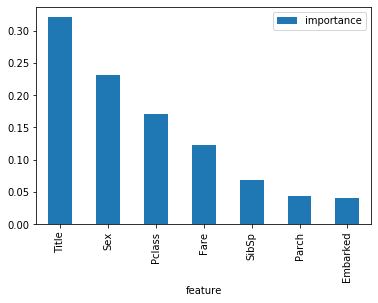

In [34]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()
importances.head(15)

In [35]:
predictions = random_forest.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('Sub_randforest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
